# Final Project - Mental Risk prediction

### Cleaning and Inspecting Original Data

In [ ]:
import pandas as pd

In [ ]:
file_path = "/content/Mental Health Dataset.csv"
df = pd.read_csv(file_path)

df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
print("\nShape: ", df.shape)
print("\nColumns: ", df.columns.tolist())
print("\nData Types:\n", df.dtypes)



Shape:  (292364, 17)

Columns:  ['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']

Data Types:
 Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object


In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())



Missing values per column:
Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

Duplicates: 2313


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# All columns except Timestamp to category
cat_cols = [col for col in df.columns if col != 'Timestamp']
df[cat_cols] = df[cat_cols].astype('category')

print("\nData Types after conversion:\n", df.dtypes)


Data Types after conversion:
 Timestamp                  datetime64[ns]
Gender                           category
Country                          category
Occupation                       category
self_employed                    category
family_history                   category
treatment                        category
Days_Indoors                     category
Growing_Stress                   category
Changes_Habits                   category
Mental_Health_History            category
Mood_Swings                      category
Coping_Struggles                 category
Work_Interest                    category
Social_Weakness                  category
mental_health_interview          category
care_options                     category
dtype: object


In [ ]:
#  Clean Categorial Values

import numpy as np

# Standardize yes/no-like responses across all columns
def standardize_binary(val):
    if isinstance(val, str):
        val_lower = val.strip().lower()
        if val_lower in ['yes', 'y']:
            return 'Yes'
        elif val_lower in ['no', 'n']:
            return 'No'
        elif val_lower in ['maybe', 'not sure', 'not_sure', 'unsure']:
            return 'Maybe'
    return val

# Apply standardization to object/category columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].apply(standardize_binary)

# Preview cleaned categories
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))


Column: Gender
Gender
Male      239850
Female     52514
Name: count, dtype: int64

Column: Country
Country
United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Italy                       1560
Switzerland                 1560
Israel                      1560
Belgium                      824
Poland                       824
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Bosnia and Herzegovina       390
Costa Rica                   390
Finland                      390
Czech Republic               390
Colombia                     390
G

In [ ]:
#  Clean and Convert Days_Indoors
#  This script handles the Days_Indoors column and covert it into a numeric range suitable for ML models

# Clean and convert 'Days_Indoors' to ordered categories or numeric range

# Preview unique values
print("\nUnique values in 'Days_Indoors' before cleaning:")
print(df['Days_Indoors'].unique())

# Create a mapping to convert ranges to mid-point numeric values
days_indoors_map = {
    '1-14': 7,
    '15-29': 22,
    '30-59': 45,
    '60-89': 75,
    '90-120': 105,
    '120+': 130,
    'None': 0,
    'none': 0,
    '0': 0
}

# Apply mapping (fill unmapped values with NaN)
df['Days_Indoors_Clean'] = df['Days_Indoors'].map(days_indoors_map)

# Show result
print("\nValue counts after mapping 'Days_Indoors':")
print(df['Days_Indoors_Clean'].value_counts(dropna=False).sort_index())


Unique values in 'Days_Indoors' before cleaning:
['1-14 days', 'Go out Every day', 'More than 2 months', '15-30 days', '31-60 days']
Categories (5, object): ['1-14 days', '15-30 days', '31-60 days', 'Go out Every day',
                         'More than 2 months']

Value counts after mapping 'Days_Indoors':
Days_Indoors_Clean
NaN    284858
Name: count, dtype: int64


In [ ]:
# Extract features from Timestamp

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract useful time features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.day_name()

# Preview extracted columns
print("\nTimestamp feature preview:")
print(df[['Timestamp', 'Year', 'Month', 'Weekday']].head())

# Optional: drop Timestamp if not needed further
# df.drop(columns=['Timestamp'], inplace=True)


Timestamp feature preview:
            Timestamp  Year  Month    Weekday
3 2014-08-27 11:37:00  2014      8  Wednesday
4 2014-08-27 11:43:00  2014      8  Wednesday
5 2014-08-27 11:49:00  2014      8  Wednesday
6 2014-08-27 11:51:00  2014      8  Wednesday
7 2014-08-27 11:52:00  2014      8  Wednesday


In [ ]:
#  Handle Missing Values Gracefully
#  Code block to replace the harsh dropna() approach with smarter handling:

# Handle missing values more gracefully

# Check missing value counts
print("\nMissing values per column BEFORE handling:")
print(df.isnull().sum())

# Strategy 1: Fill 'Maybe' with separate category where appropriate
# Already handled in earlier standardization step

# Strategy 2: For 'Days_Indoors_Clean', fill NaN with median (or mean)
df['Days_Indoors_Clean'].fillna(df['Days_Indoors_Clean'].median(), inplace=True)

# Strategy 3: Drop rows with missing 'treatment' (target variable)
df = df[df['treatment'].notnull()]

# Strategy 4: For other remaining NaNs, fill with 'Unknown' or most frequent value
for col in df.columns:
    if df[col].dtype.name == 'category' or df[col].dtype == object:
        most_frequent = df[col].mode().iloc[0]
        df[col].fillna(most_frequent, inplace=True)

# Strategy 5: Final check on missing values
print("\nMissing values per column AFTER handling:")
print(df.isnull().sum())


Missing values per column BEFORE handling:
Timestamp                       0
Gender                          0
Country                         0
Occupation                      0
self_employed                   0
family_history                  0
treatment                       0
Days_Indoors                    0
Growing_Stress                  0
Changes_Habits                  0
Mental_Health_History           0
Mood_Swings                     0
Coping_Struggles                0
Work_Interest                   0
Social_Weakness                 0
mental_health_interview         0
care_options                    0
Days_Indoors_Clean         284858
Year                            0
Month                           0
Weekday                         0
dtype: int64

Missing values per column AFTER handling:
Timestamp                       0
Gender                          0
Country                         0
Occupation                      0
self_employed                   0
family_history  

/tmp/ipython-input-14-4294025066.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Days_Indoors_Clean'].fillna(df['Days_Indoors_Clean'].median(), inplace=True)
/tmp/ipython-input-14-4294025066.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Remove NaN values
df = df.dropna()

print("\n Shape after cleaning: ", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


 Shape after cleaning:  (284858, 17)

Missing values after cleaning:
Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [ ]:
df.describe(include='all')

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,...,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Days_Indoors_Clean,Year,Month,Weekday
count,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,...,284858,284858,284858,284858,284858,284858,0.0,284858.000000,284858.000000,284858
unique,NaN,2,35,5,2,2,2,5,3,3,...,3,2,3,3,3,3,NaN,NaN,NaN,7
top,NaN,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,...,Medium,No,No,Maybe,No,No,NaN,NaN,NaN,Wednesday
freq,NaN,234000,165869,64728,255711,172357,143331,61994,97540,106844,...,98592,150318,103136,100746,227036,115233,NaN,NaN,NaN,138406
mean,2014-09-09 11:47:30.245174784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.054259,7.795575,NaN
min,2014-08-27 11:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,2.000000,NaN
25%,2014-08-27 14:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,8.000000,NaN
50%,2014-08-28 03:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,8.000000,NaN
75%,2014-08-28 23:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,8.000000,NaN
max,2016-02-01 23:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,12.000000,NaN


In [ ]:
# Print the df to verify all cleaning steps
print("\nCleaned DataFrame:")
df.head()


Cleaned DataFrame:


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,...,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Days_Indoors_Clean,Year,Month,Weekday
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,Maybe,Yes,NaN,2014,8,Wednesday
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,No,Yes,NaN,2014,8,Wednesday
5,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,Maybe,Maybe,NaN,2014,8,Wednesday
6,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,No,Maybe,NaN,2014,8,Wednesday
7,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,...,Medium,No,No,Yes,No,No,NaN,2014,8,Wednesday


### Exploratory Data Analysis


=== Gender ===


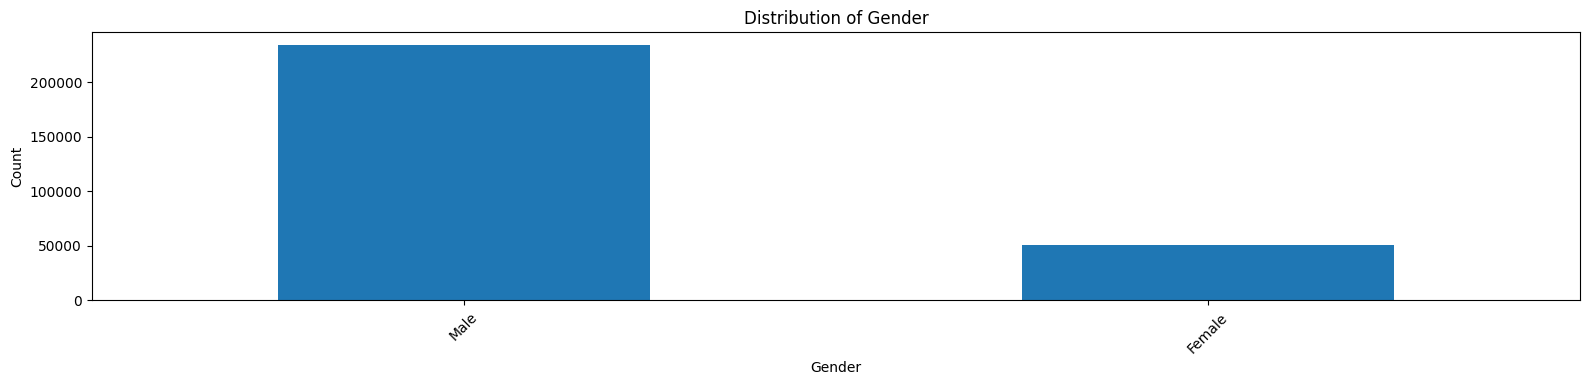


=== Country ===


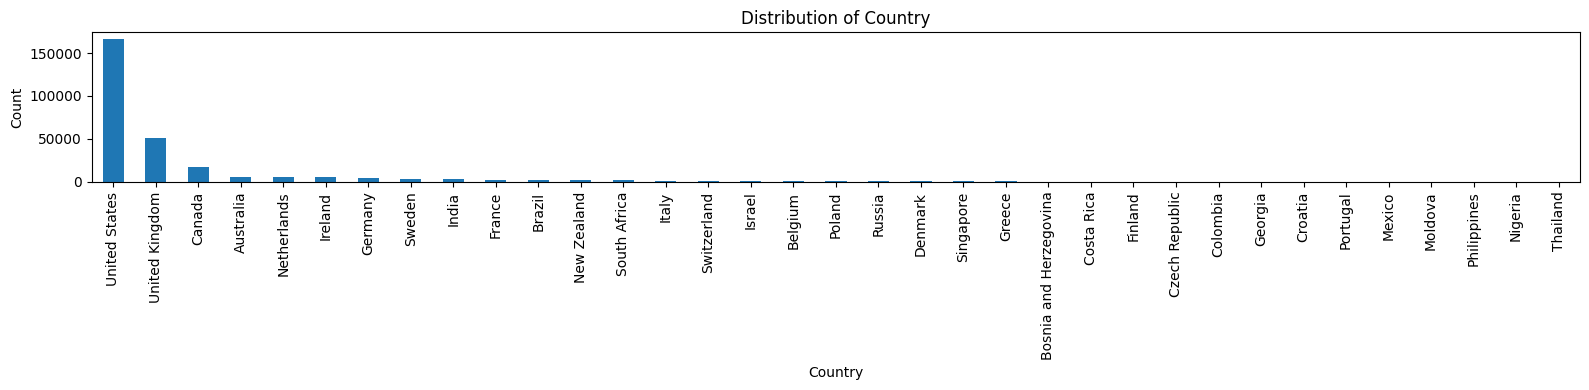


=== Occupation ===


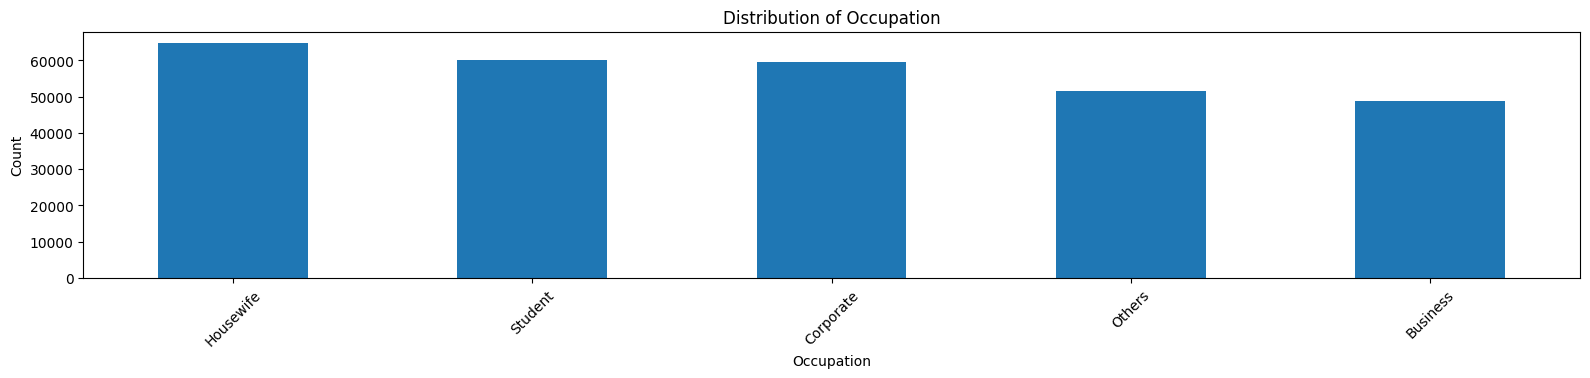


=== self_employed ===


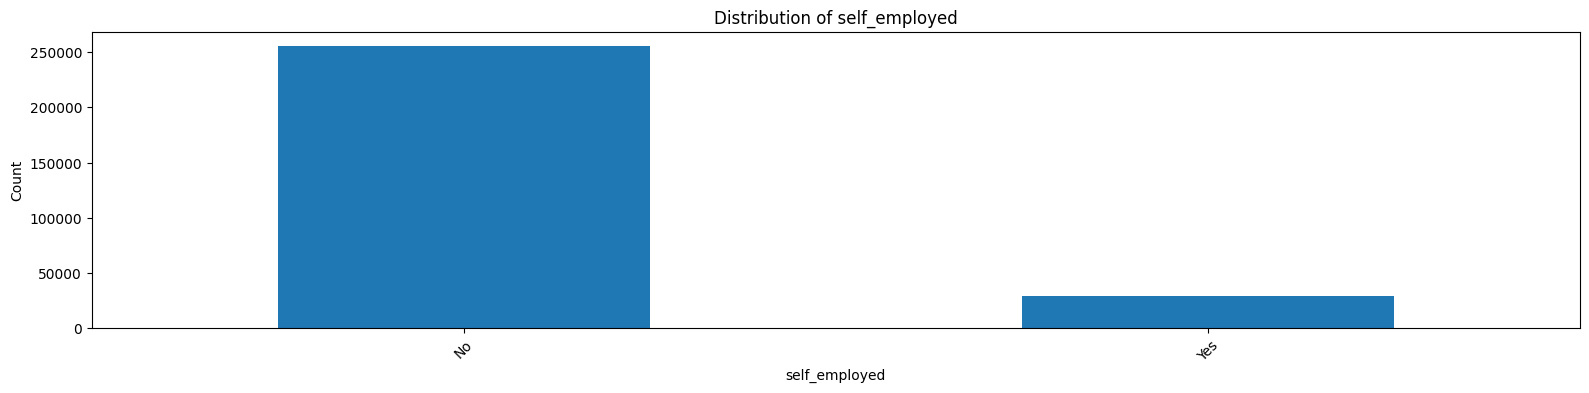


=== family_history ===


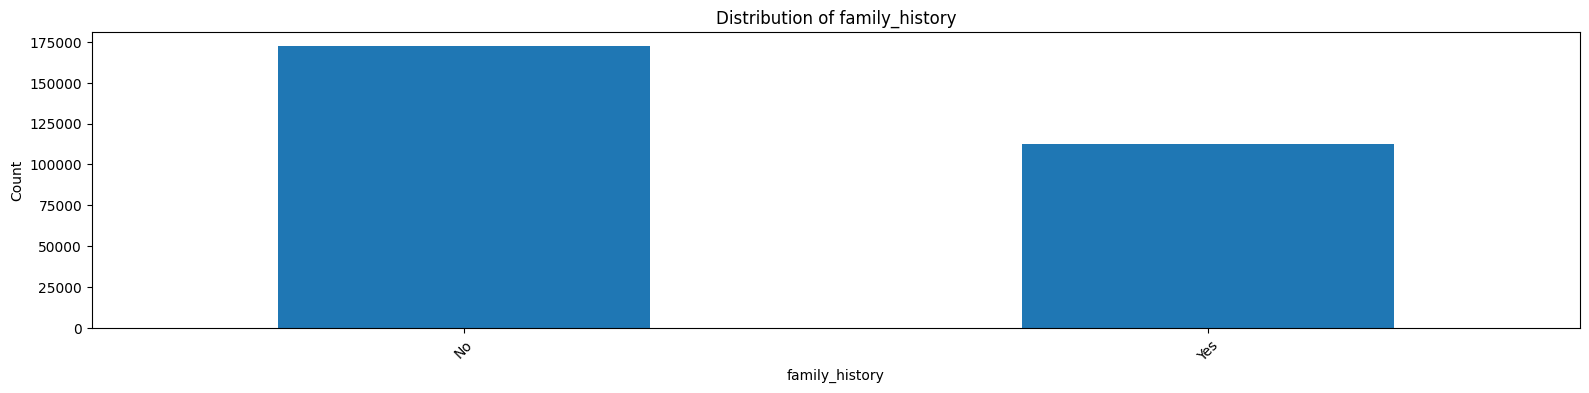


=== treatment ===


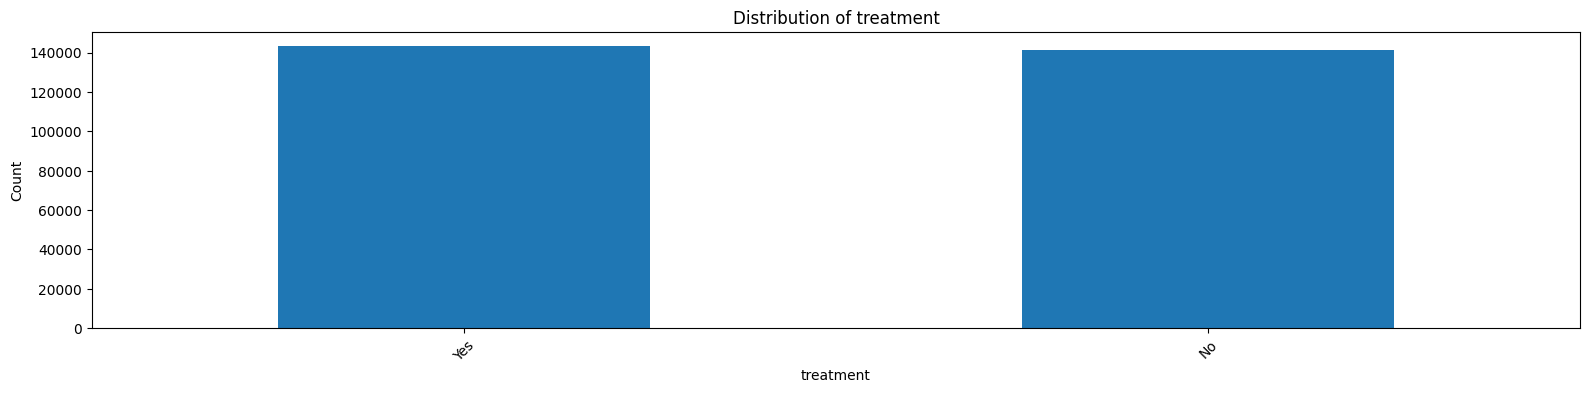


=== Days_Indoors ===


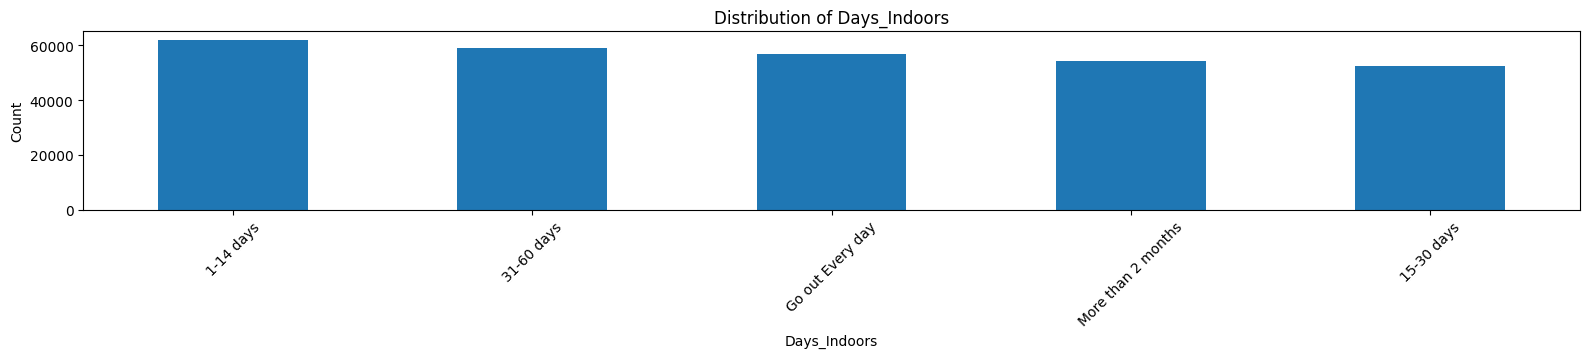


=== Growing_Stress ===


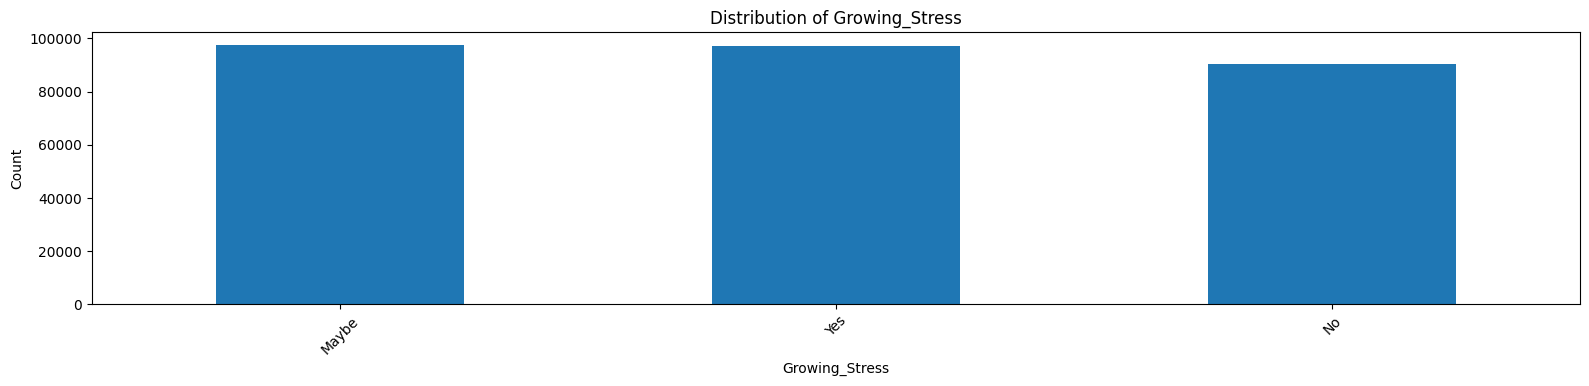


=== Changes_Habits ===


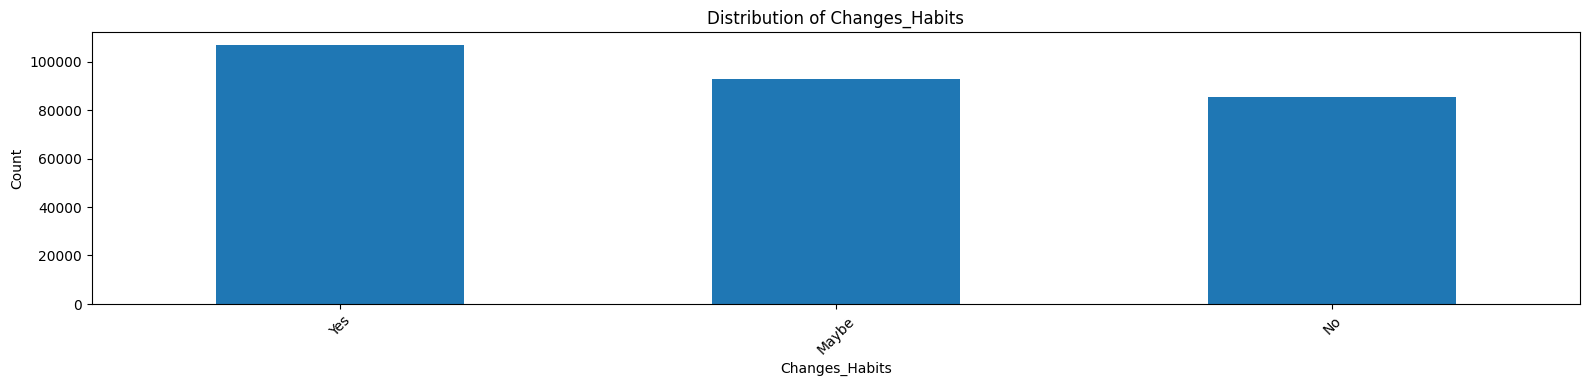


=== Mental_Health_History ===


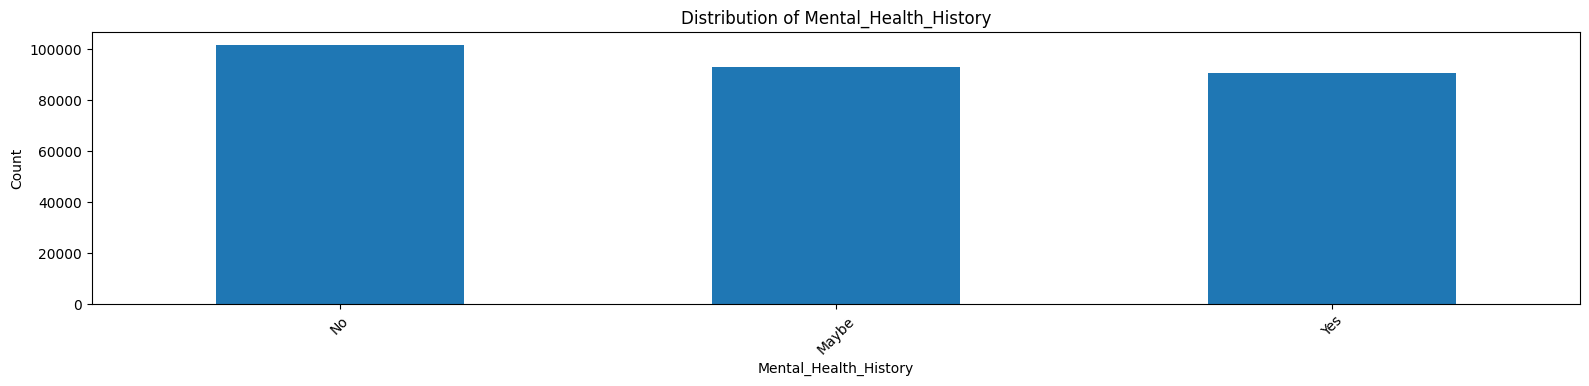


=== Mood_Swings ===


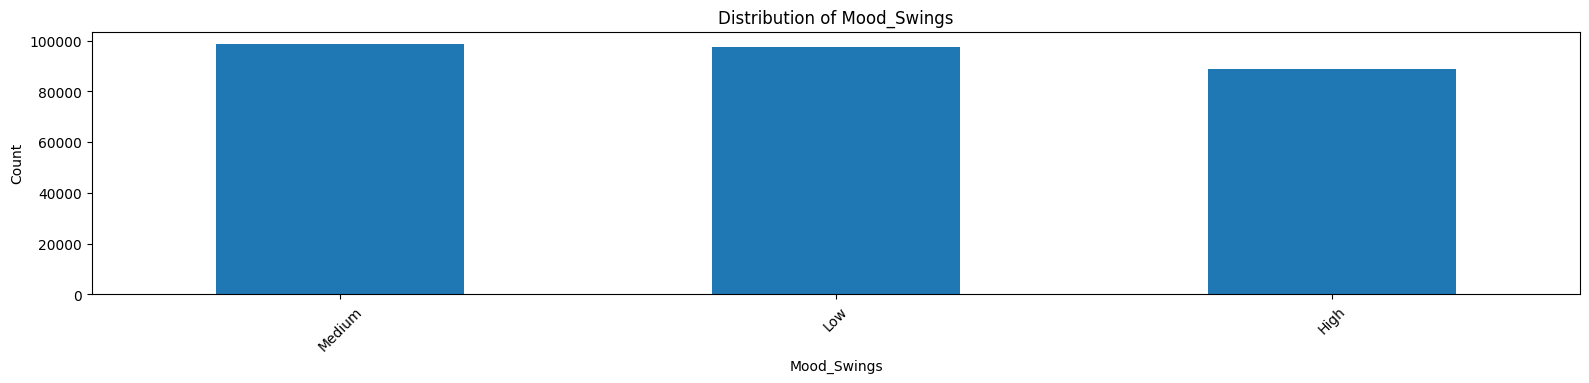


=== Coping_Struggles ===


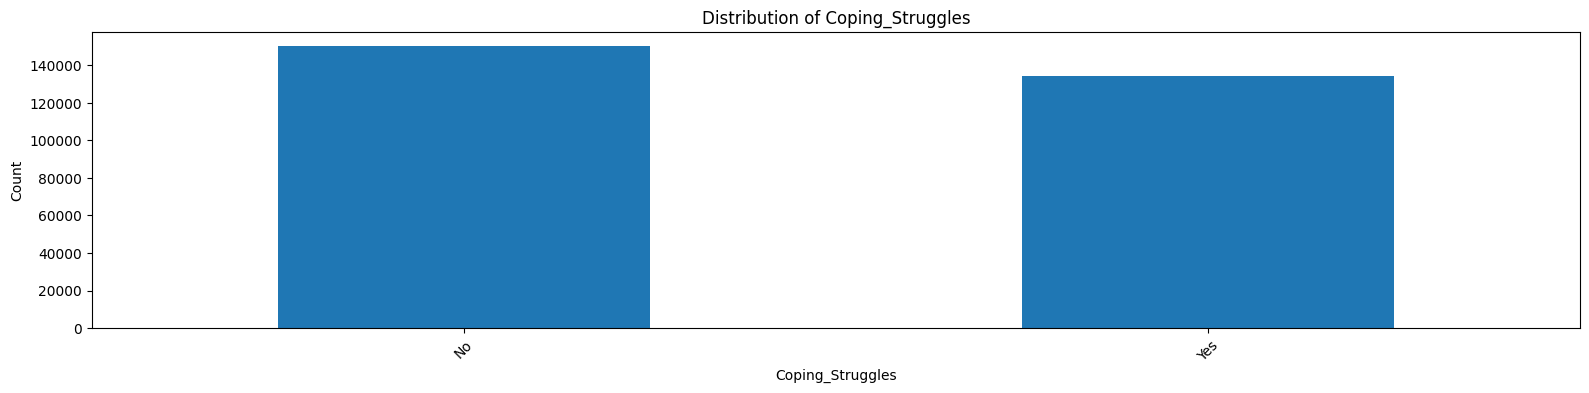


=== Work_Interest ===


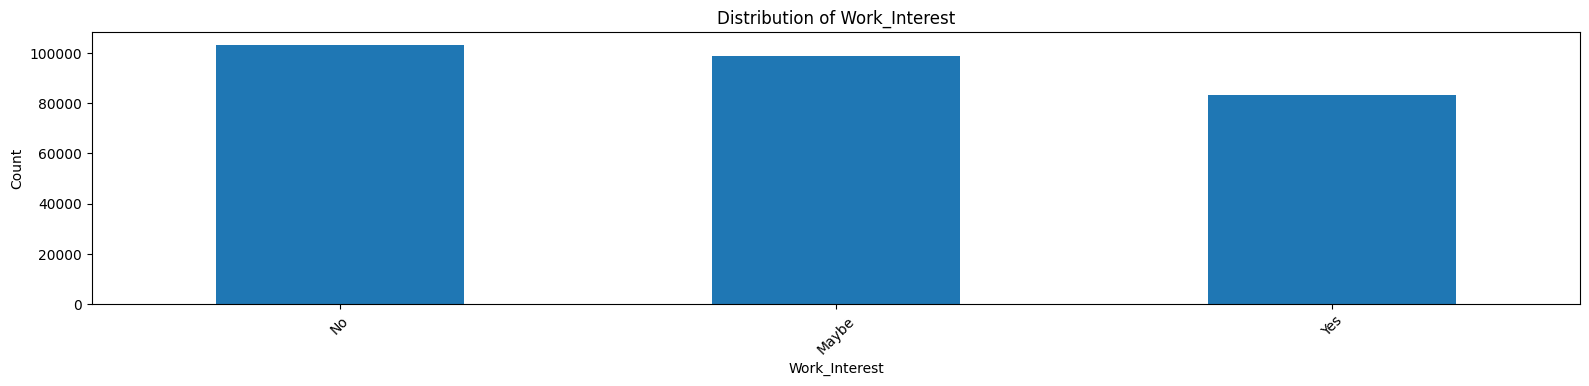


=== Social_Weakness ===


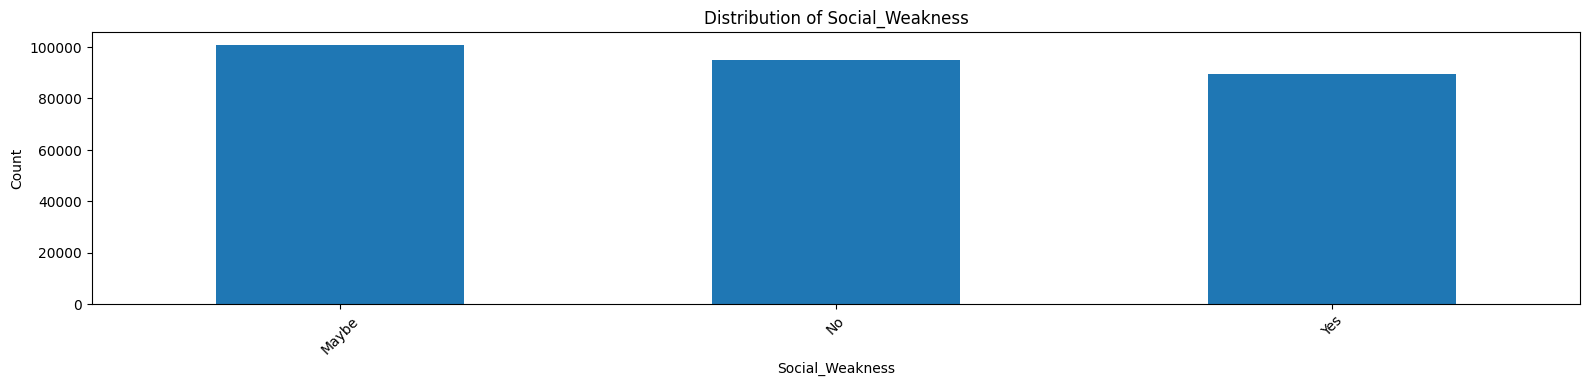


=== mental_health_interview ===


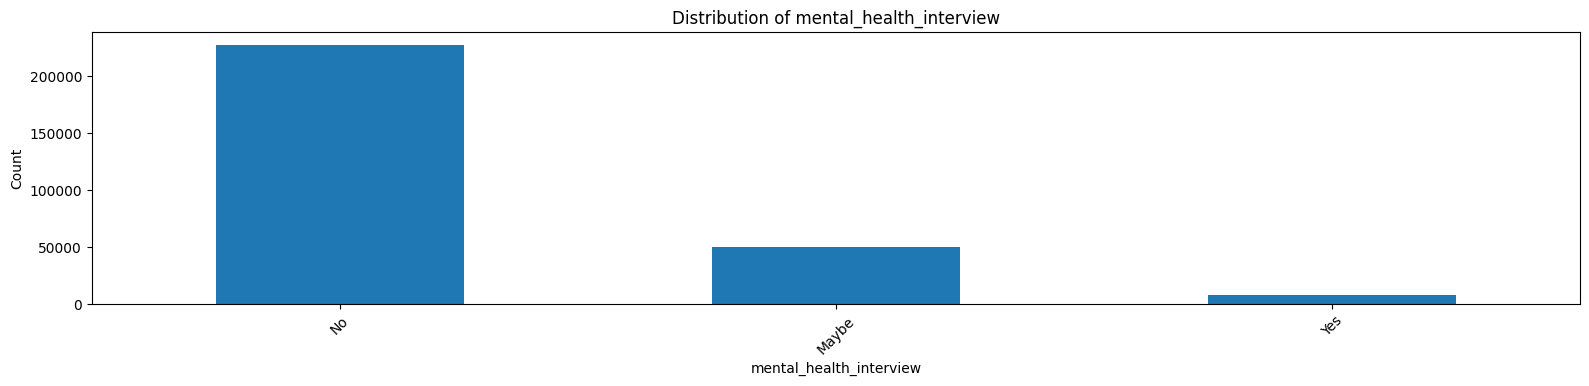


=== care_options ===


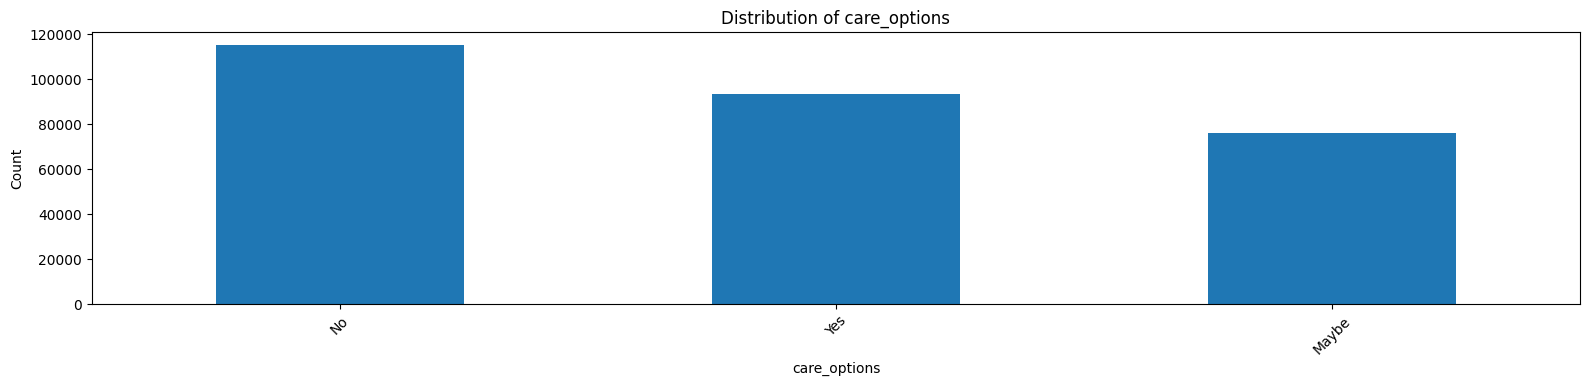

In [ ]:
import matplotlib.pyplot as plt

for col in cat_cols:
    print(f"\n=== {col} ===")
    plt.figure(figsize=(16, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    if col.lower() == "country":
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    plt.show()

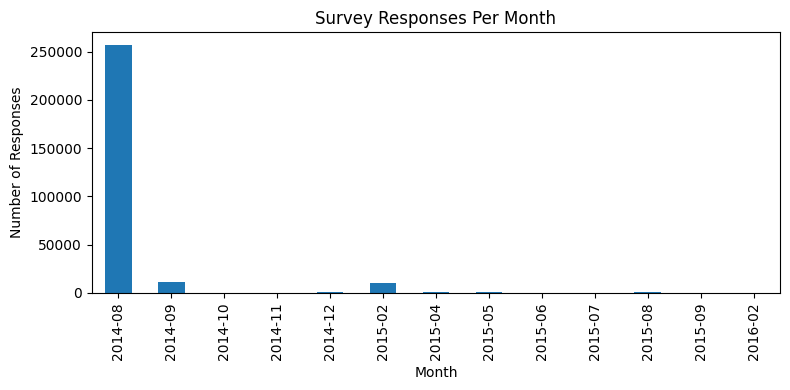

In [ ]:
# Extract month (year and month)
df['Month'] = df['Timestamp'].dt.to_period('M')

monthly_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(8,4))
monthly_counts.plot(kind='bar')
plt.title('Survey Responses Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

# drop the 'Month' column
df.drop(columns=['Month'], inplace=True)
